# Installing Dependencies

In [3]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym\[classic_control\]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install moviepy

# Importing dependencies and define helper functions


In [4]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
# import tensorflow as tf
from typing import NamedTuple
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data=''''''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
     
     



# Tutorial: Loading CartPole environment

In [5]:
env = gym.make("CartPole-v1")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [6]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity.

In [7]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [8]:
observation = env.reset()
print("Initial observations:", observation)

Initial observations: (array([0.0285473 , 0.03688034, 0.00891802, 0.0439163 ], dtype=float32), {})


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [9]:

observation, reward, done, info, _ = env.step(0)
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)

New observations after choosing action 0: [ 0.02928491 -0.15836835  0.00979634  0.33939955]
Reward for this step: 1.0
Is this round done? False


Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [10]:
observation = env.reset()
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, info, _ = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 10.0


# Task 1: Development of an RL agent

In [11]:
def rand_policy_agent(observation):
    return random.randint(0, 1)

# Algorithm Used:
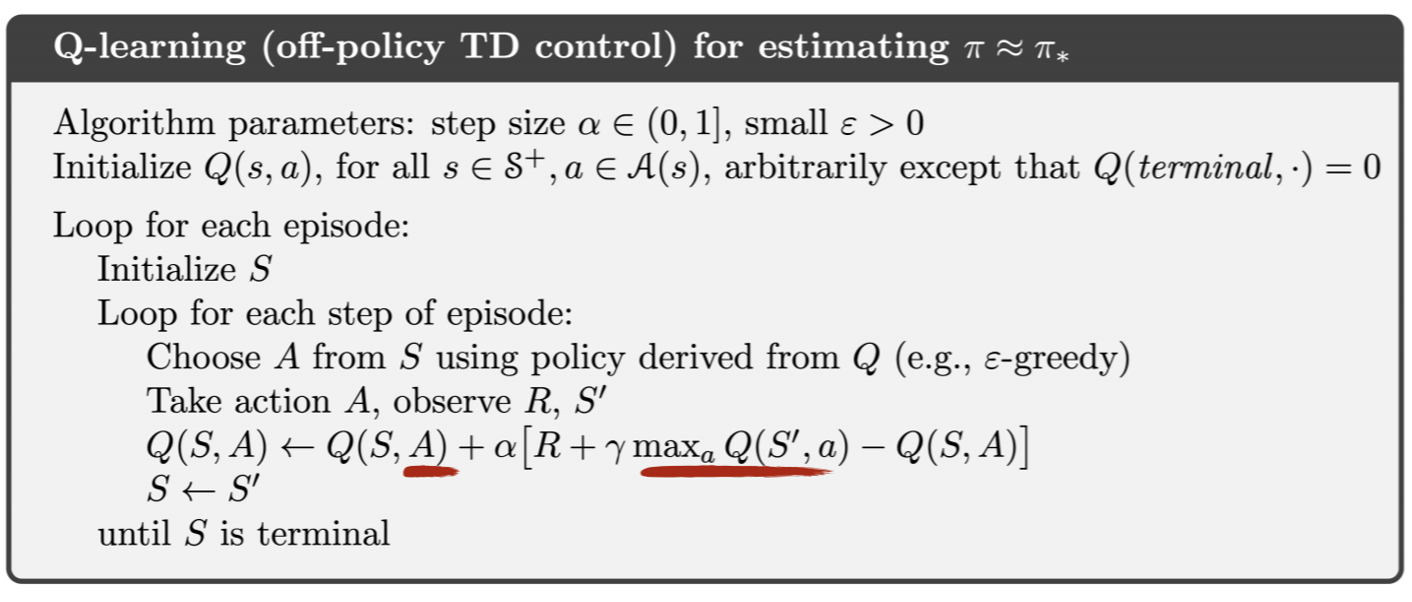



Episode: 0 Rewards: 10.0  Epsilon: 0.10  Mean Rewards 10.0
Episode: 100 Rewards: 61.0  Epsilon: 0.10  Mean Rewards 26.4
Episode: 200 Rewards: 10.0  Epsilon: 0.10  Mean Rewards 24.0
Episode: 300 Rewards: 14.0  Epsilon: 0.10  Mean Rewards 22.0
Episode: 400 Rewards: 62.0  Epsilon: 0.10  Mean Rewards 33.4
Episode: 500 Rewards: 13.0  Epsilon: 0.10  Mean Rewards 33.9
Episode: 600 Rewards: 15.0  Epsilon: 0.10  Mean Rewards 39.4
Episode: 700 Rewards: 41.0  Epsilon: 0.10  Mean Rewards 47.2
Episode: 800 Rewards: 150.0  Epsilon: 0.10  Mean Rewards 66.3
Episode: 900 Rewards: 136.0  Epsilon: 0.10  Mean Rewards 83.2


NameError: name 'pickle' is not defined

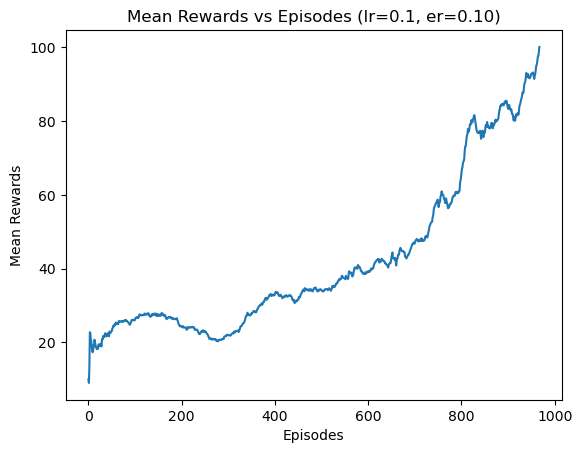

In [13]:
# Train the agent to reach a minimum of 100 avg rewards
agent = QLearningAgent(env)
agent.train(min_rewards=100, plot=True)
agent.save_model()

In [ ]:
state, action = agent.show_action()
print(f"Returned Observations: {state}")
print(f"Returned Chosen Action: {action}")

# Task 2: Demonstrate the effectiveness of the RL agent

Episode: 1 Rewards: 759.0
Episode: 2 Rewards: 508.0
Episode: 3 Rewards: 480.0
Episode: 4 Rewards: 666.0
Episode: 5 Rewards: 872.0
Episode: 6 Rewards: 669.0
Episode: 7 Rewards: 617.0
Episode: 8 Rewards: 920.0
Episode: 9 Rewards: 774.0
Episode: 10 Rewards: 862.0
Episode: 11 Rewards: 913.0
Episode: 12 Rewards: 350.0
Episode: 13 Rewards: 409.0
Episode: 14 Rewards: 602.0
Episode: 15 Rewards: 485.0
Episode: 16 Rewards: 789.0
Episode: 17 Rewards: 546.0
Episode: 18 Rewards: 627.0
Episode: 19 Rewards: 498.0
Episode: 20 Rewards: 458.0
Episode: 21 Rewards: 642.0
Episode: 22 Rewards: 449.0
Episode: 23 Rewards: 363.0
Episode: 24 Rewards: 600.0
Episode: 25 Rewards: 552.0
Episode: 26 Rewards: 934.0
Episode: 27 Rewards: 698.0
Episode: 28 Rewards: 863.0
Episode: 29 Rewards: 952.0
Episode: 30 Rewards: 887.0
Episode: 31 Rewards: 621.0
Episode: 32 Rewards: 845.0
Episode: 33 Rewards: 691.0
Episode: 34 Rewards: 635.0
Episode: 35 Rewards: 621.0
Episode: 36 Rewards: 621.0
Episode: 37 Rewards: 537.0
Episode: 3

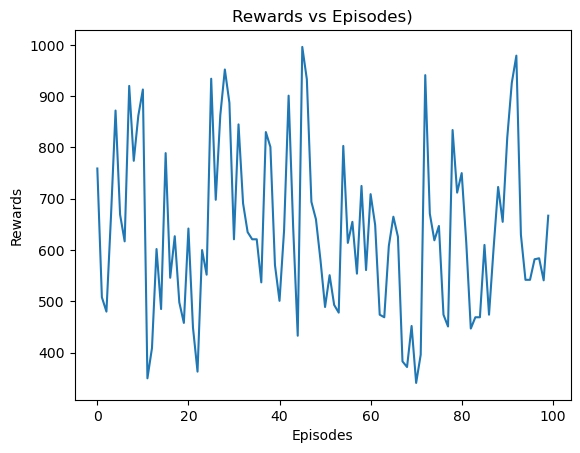

In [153]:
# Test the agent
env = gym.make('CartPole-v1')
agent = QLearningAgent(env)
agent.load_model('cartpoleQLAgent.pkl')
episode_results = agent.test(num_episodes=100, plot=True)

Episode: 1 Rewards: 590.0
Episode: 2 Rewards: 419.0
Episode: 3 Rewards: 709.0
Episode: 4 Rewards: 458.0
Episode: 5 Rewards: 937.0
Episode: 6 Rewards: 572.0
Episode: 7 Rewards: 648.0
Episode: 8 Rewards: 917.0
Episode: 9 Rewards: 338.0
Episode: 10 Rewards: 468.0
Episode: 11 Rewards: 718.0
Episode: 12 Rewards: 443.0
Episode: 13 Rewards: 659.0
Episode: 14 Rewards: 709.0
Episode: 15 Rewards: 887.0
Episode: 16 Rewards: 403.0
Episode: 17 Rewards: 661.0
Episode: 18 Rewards: 698.0
Episode: 19 Rewards: 858.0
Episode: 20 Rewards: 712.0
Episode: 21 Rewards: 707.0
Episode: 22 Rewards: 610.0
Episode: 23 Rewards: 519.0
Episode: 24 Rewards: 550.0
Episode: 25 Rewards: 744.0
Episode: 26 Rewards: 943.0
Episode: 27 Rewards: 447.0
Episode: 28 Rewards: 356.0
Episode: 29 Rewards: 311.0
Episode: 30 Rewards: 396.0
Episode: 31 Rewards: 1108.0
Episode: 32 Rewards: 633.0
Episode: 33 Rewards: 506.0
Episode: 34 Rewards: 587.0
Episode: 35 Rewards: 541.0
Episode: 36 Rewards: 726.0
Episode: 37 Rewards: 441.0
Episode: 

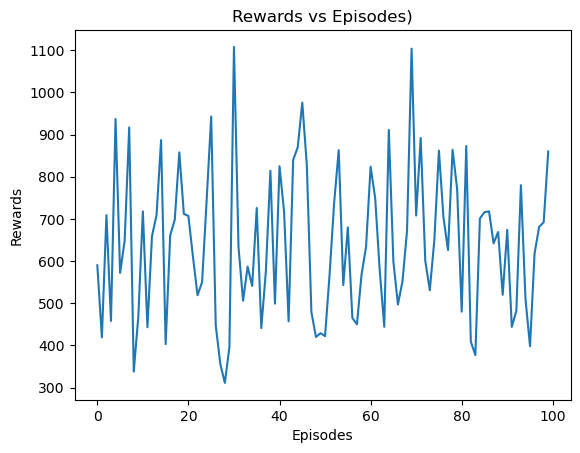

In [154]:
# Test the agent
env = gym.make('CartPole-v1')
agent = QLearningAgent(env)
agent.load_model('cartpoleQLAgent.pkl')
episode_results = agent.test(num_episodes=100, plot=True)

In [159]:
print("Average cumulative reward:", episode_results.mean())
print("Is my agent good enough?", episode_results.mean() > 195)


Average cumulative reward: 626.81
Is my agent good enough? True


# Task 3: Task 3: Render one episode played by the developed RL agent

In [160]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
env = RecordVideo(env, './video')
agent = QLearningAgent(env)
agent.load_model('cartpoleQLAgent.pkl')
agent.run_one_episode(is_training=False)
env.close()
show_video()

Moviepy - Building video /Users/pp16/Desktop/NTU/Y2S2/SC3000/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/pp16/Desktop/NTU/Y2S2/SC3000/video/rl-video-episode-0.mp4



TypeError: must be real number, not NoneType